In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [3]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-08-29_extreme_flanker_end_criterion_shorter_range.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

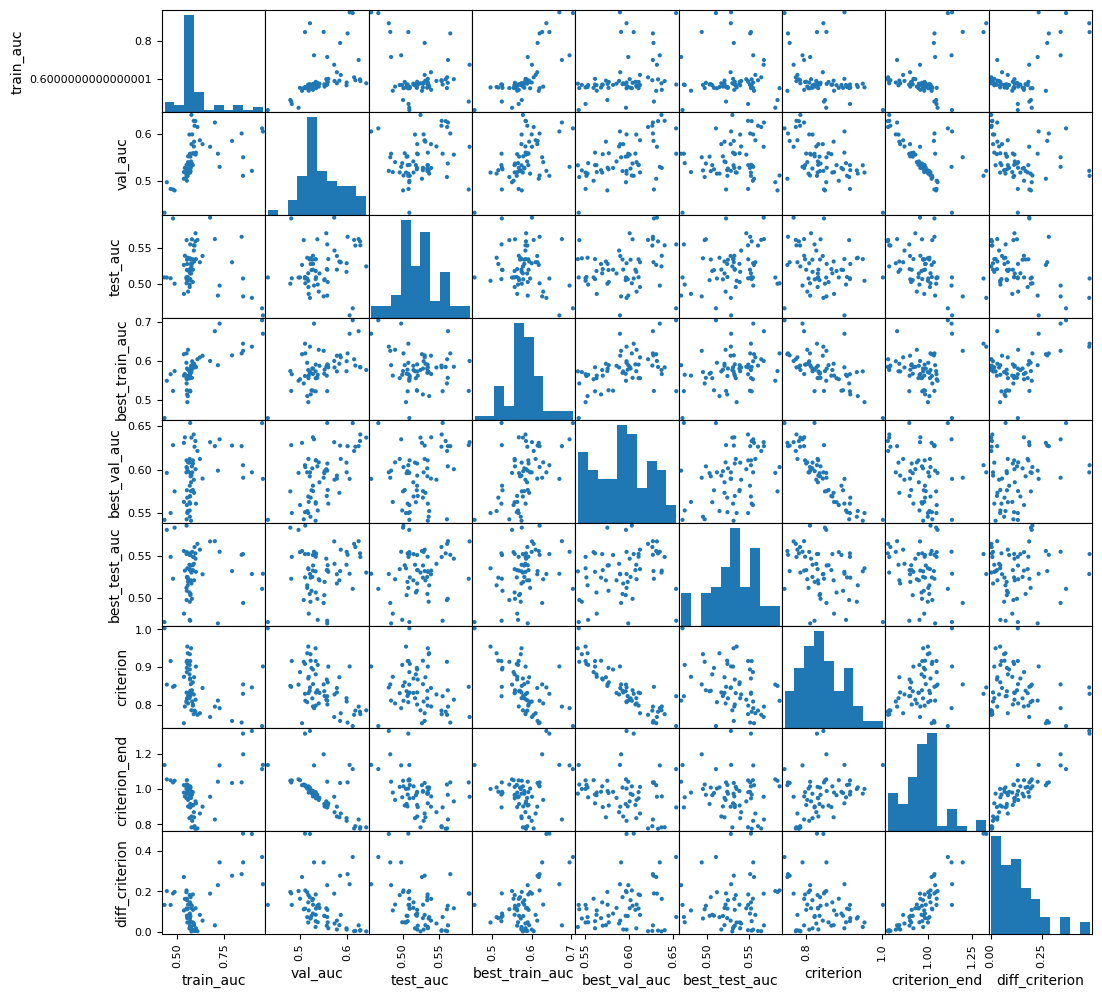

In [4]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

In [5]:
# bdd[bdd['best_test_auc']>0.6]['model_path'].iat[0]

Text(0, 0.5, 'best_test_auc')

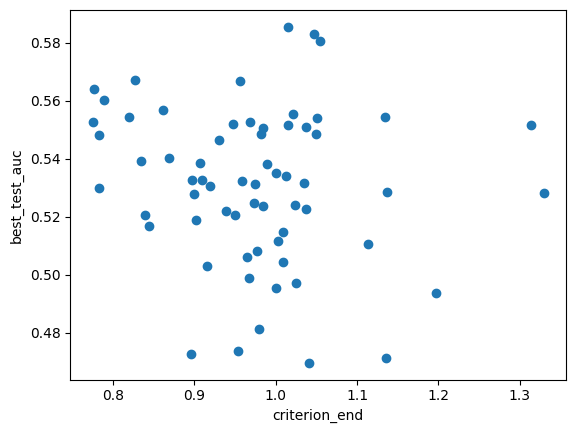

In [6]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

(0.75, 1.1)

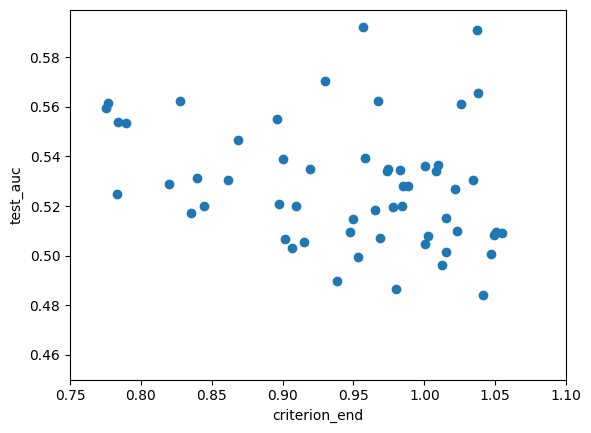

In [7]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,1.1))

Text(0, 0.5, 'test_auc')

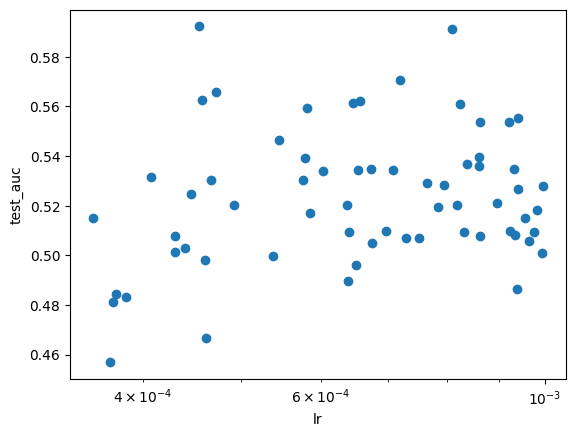

In [8]:
plt.scatter(bdd.lr, bdd.test_auc)
plt.xlabel("lr")
plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

In [9]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


(0.5, 0.6)

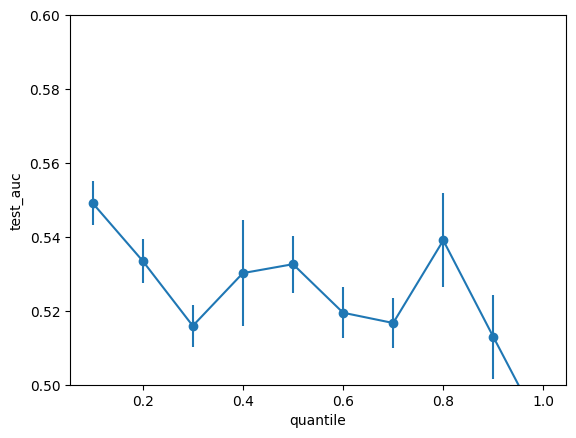

In [10]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.5,0.6))

(0.5, 0.6)

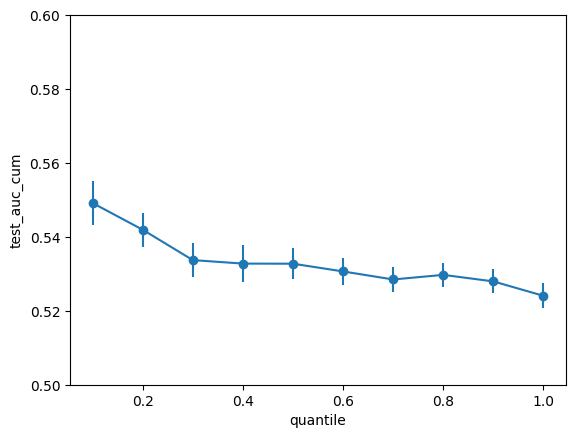

In [11]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.5,0.6))

(0.75, 0.9)

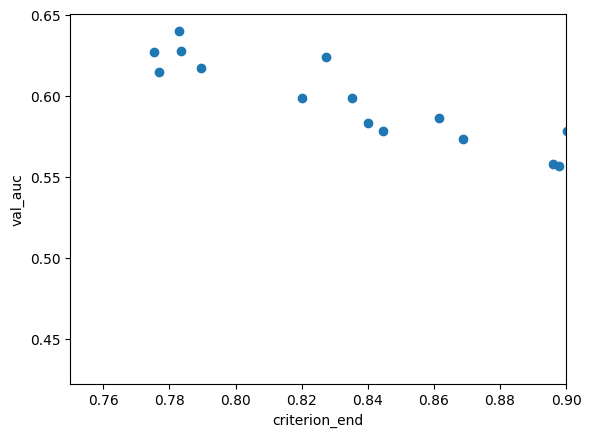

In [12]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")
plt.xlim((0.75,0.9))

(0.45, 0.7)

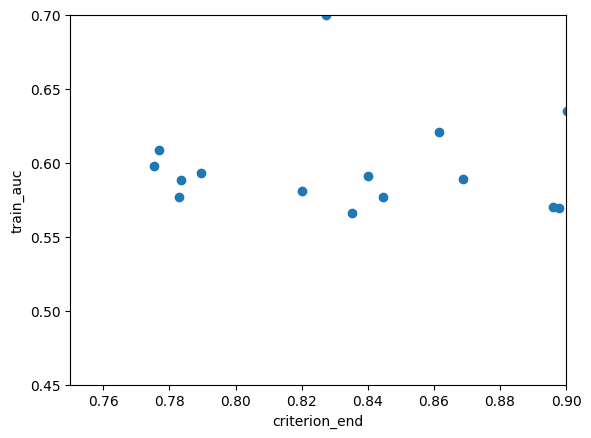

In [13]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")
plt.xlim((0.75,0.9))
plt.ylim((0.45,0.7))

In [14]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
13,/volatile2/jc225751/Runs/61_classifier_regress...,0.674894,0.572831,0.592208,0.600611,0.631751,0.566811,0.160447,0.733926,0.000455,0.0,135.462387,0.767637,0.956400,0.188763,-3.469269,-2.188694,-6.153865,-2.983577
53,/volatile2/jc225751/Runs/61_classifier_regress...,0.480177,0.482324,0.591053,0.524060,0.628314,0.522511,0.188034,0.718219,0.000810,0.0,138.665695,0.847626,1.037499,0.189873,-2.260922,-4.410641,-4.896385,-3.651966
48,/volatile2/jc225751/Runs/61_classifier_regress...,0.598523,0.556137,0.570563,0.585806,0.600655,0.546320,0.192830,0.770182,0.000719,0.0,138.338196,0.813539,0.930111,0.116571,-4.209841,-2.949121,-6.518994,-3.329642
49,/volatile2/jc225751/Runs/61_classifier_regress...,0.840752,0.600982,0.565657,0.619969,0.627169,0.550938,0.186754,0.707351,0.000472,0.0,127.372978,0.752862,1.037806,0.284944,-4.933740,-1.387213,-7.553348,-2.659702
6,/volatile2/jc225751/Runs/61_classifier_regress...,0.700044,0.624223,0.562482,0.676697,0.627169,0.567100,0.162275,0.847845,0.000457,0.0,136.438568,0.795192,0.827376,0.032184,-3.005203,-2.455492,-5.624811,-2.065955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,/volatile2/jc225751/Runs/61_classifier_regress...,0.715893,0.558101,0.484271,0.589817,0.599018,0.469553,0.193601,0.710273,0.000376,0.0,135.123108,0.811165,1.041589,0.230424,-4.688461,-1.785032,-6.981274,-3.223457
37,/volatile2/jc225751/Runs/61_classifier_regress...,0.848655,0.550573,0.483117,0.626579,0.590835,0.493795,0.199358,0.787764,0.000385,0.0,128.927505,0.854075,1.196936,0.342861,-3.331355,-1.177390,-5.546247,-2.569428
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.894611,0.521768,0.481097,0.637223,0.597054,0.528139,0.184632,0.843500,0.000373,0.0,126.587952,0.846061,1.329308,0.483247,-3.214650,-0.960129,-5.488201,-2.439283
43,/volatile2/jc225751/Runs/61_classifier_regress...,0.948365,0.611784,0.466667,0.704663,0.653682,0.510534,0.160803,0.859110,0.000462,0.0,120.015800,0.743616,1.113013,0.369397,-2.976307,-1.059639,-6.048542,-1.866505


Text(0, 0.5, 'best_test_auc')

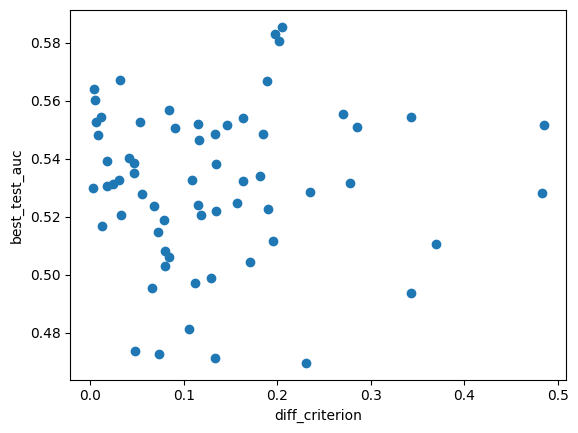

In [15]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

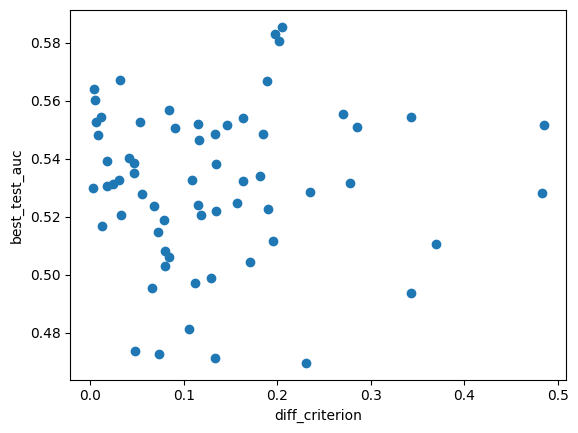

In [16]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

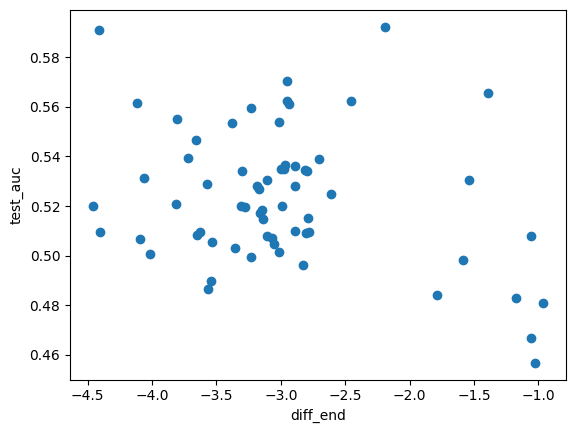

In [17]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

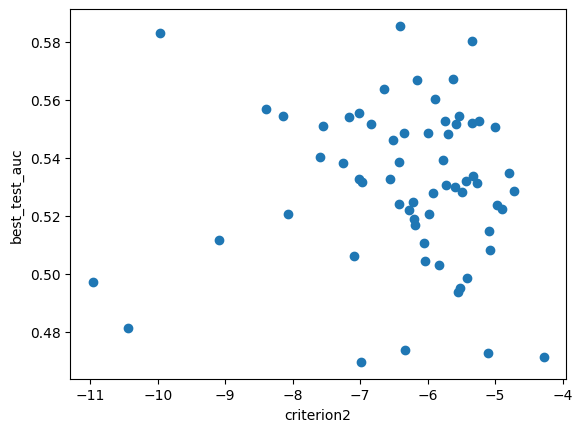

In [18]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

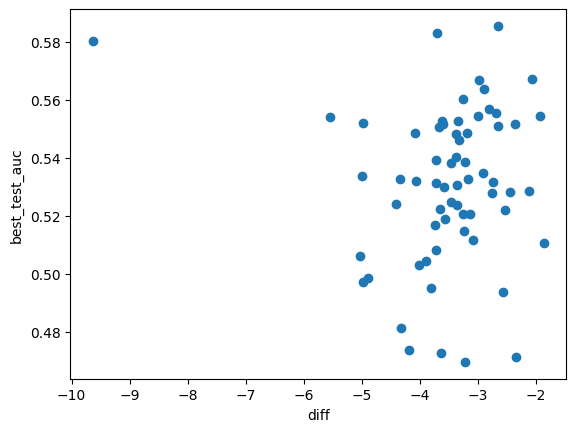

In [19]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

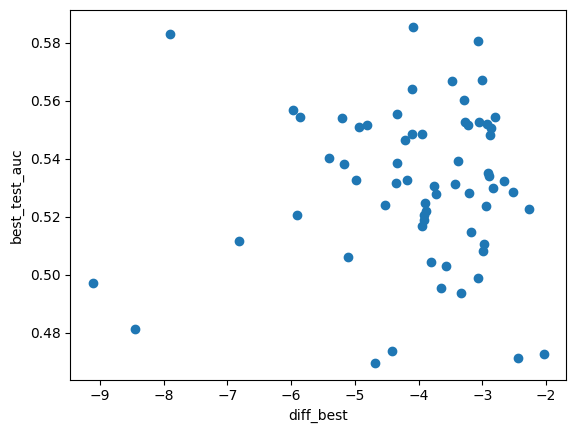

In [20]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

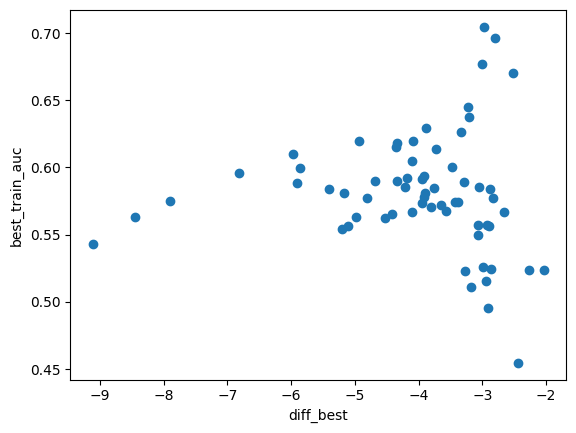

In [21]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

(0.4, 0.65)

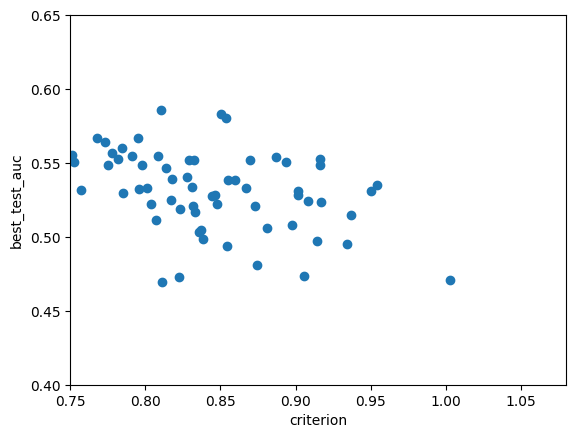

In [22]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.ylim((0.35,0.65))
plt.xlim((0.75,1.08))
plt.ylim((0.4,0.65))

(0.5, 0.65)

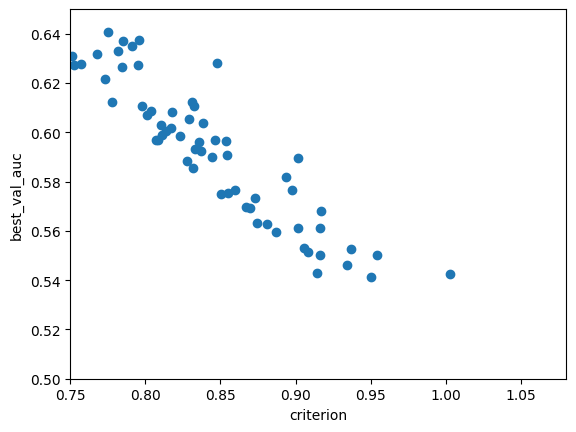

In [23]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")
plt.xlim((0.75,1.08))
plt.ylim((0.5,0.65))

(0.75, 0.9)

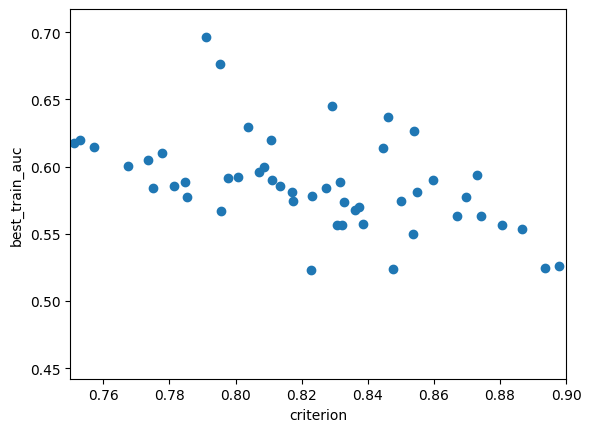

In [24]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")
plt.xlim((0.75,0.9))

(0.75, 0.9)

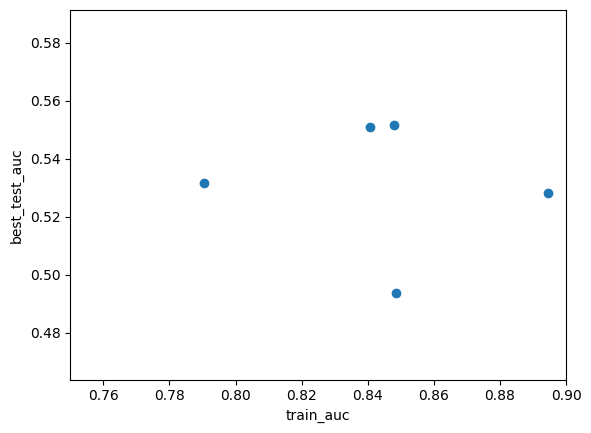

In [25]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'test_auc')

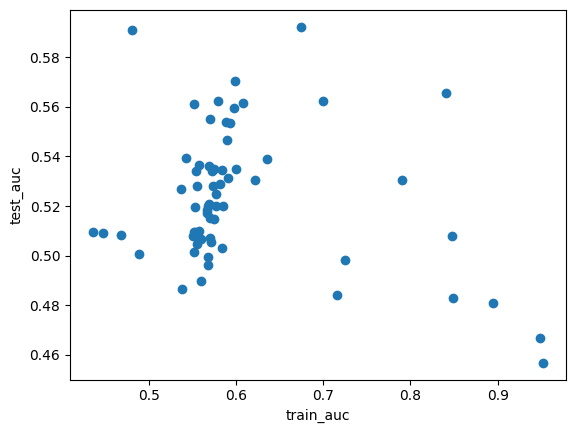

In [26]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

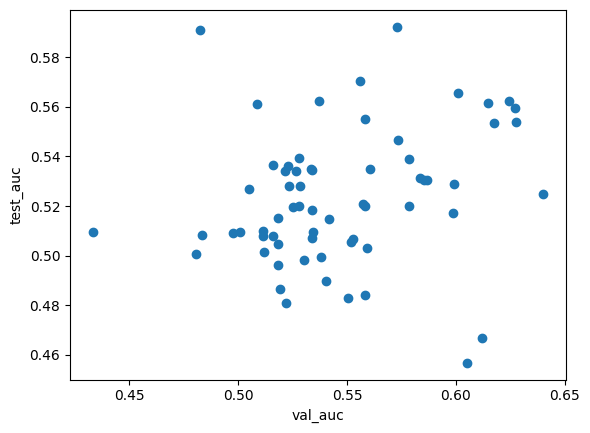

In [27]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

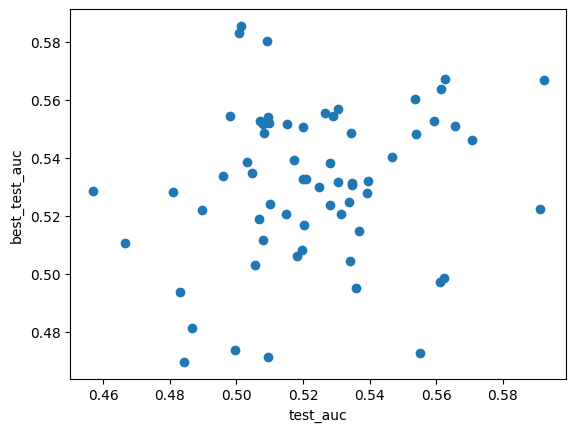

In [28]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

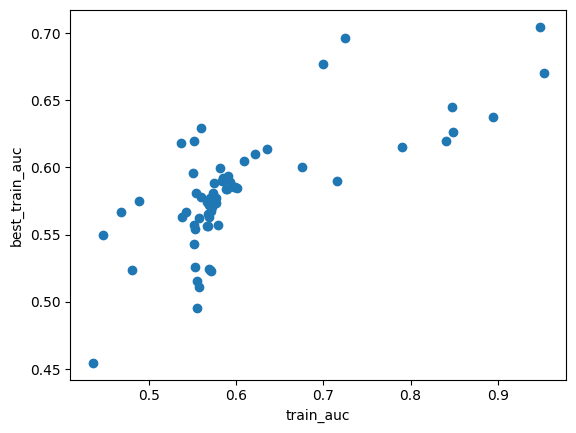

In [29]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

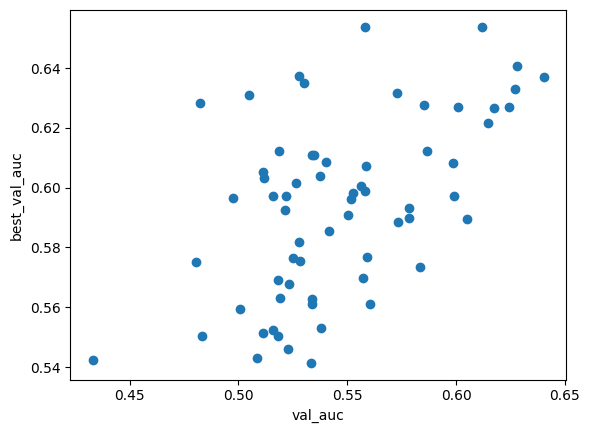

In [30]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

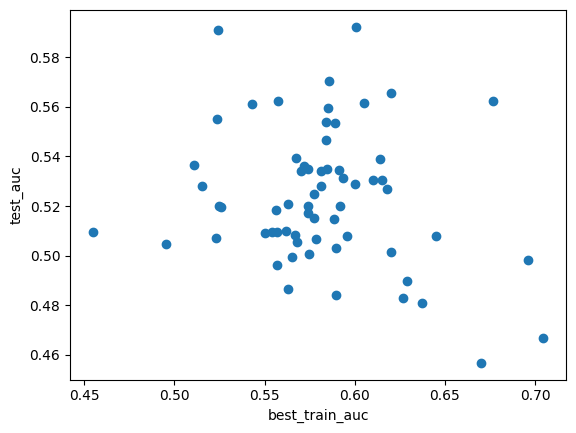

In [31]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

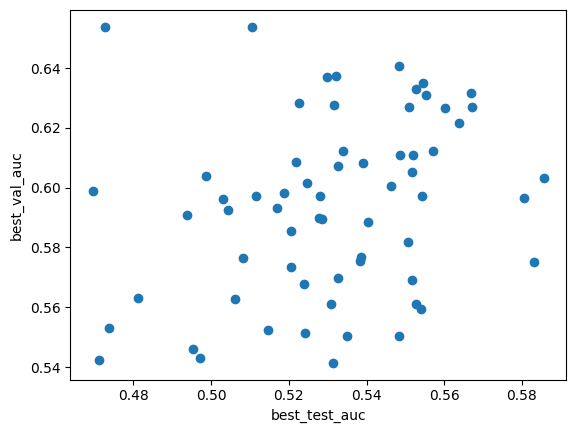

In [32]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

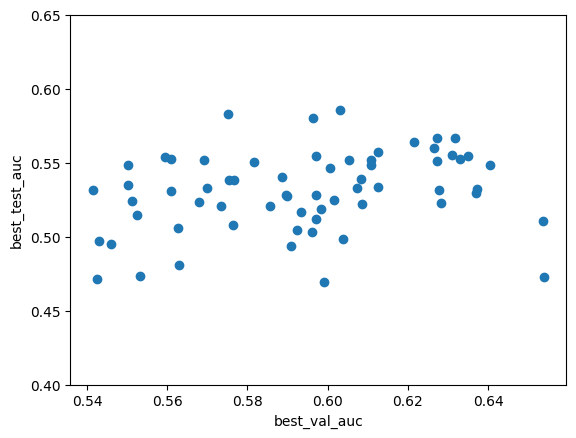

In [33]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

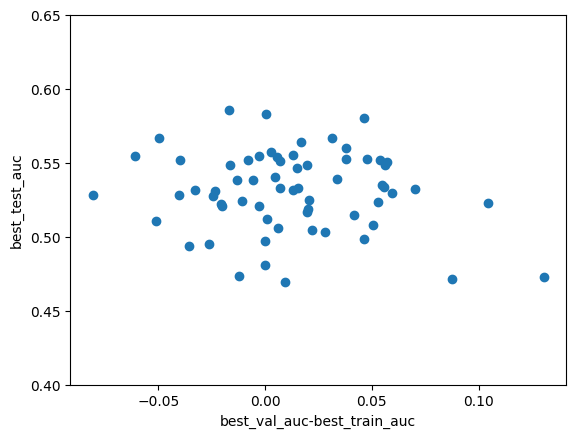

In [34]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

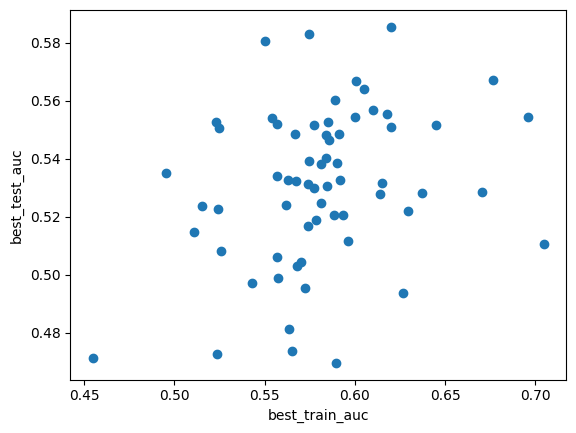

In [35]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

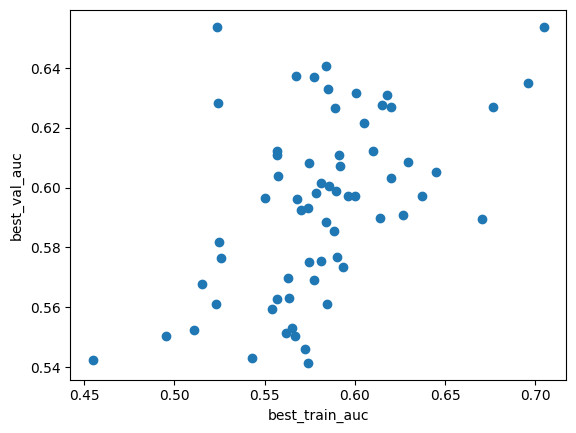

In [36]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

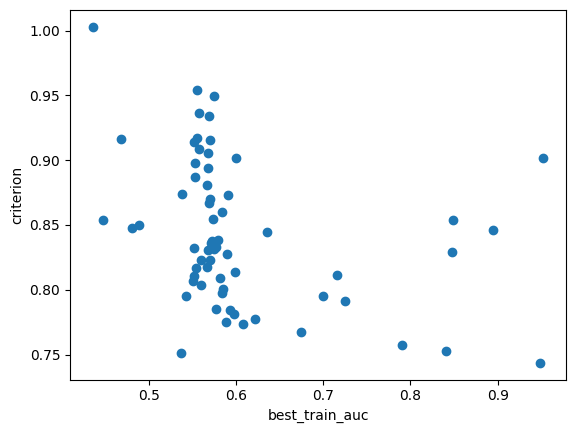

In [37]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

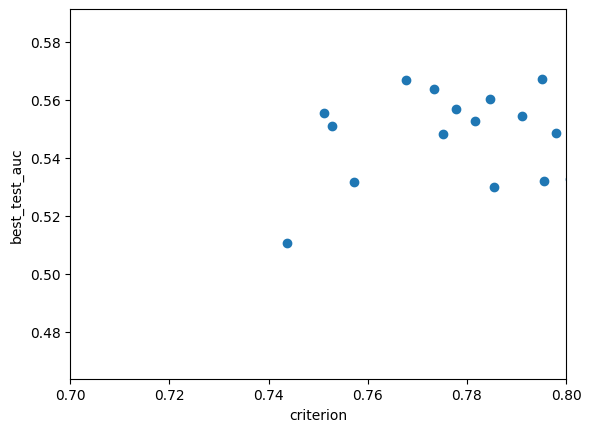

In [38]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

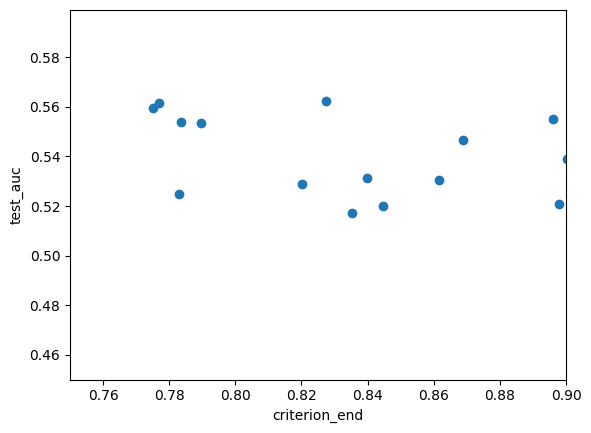

In [39]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

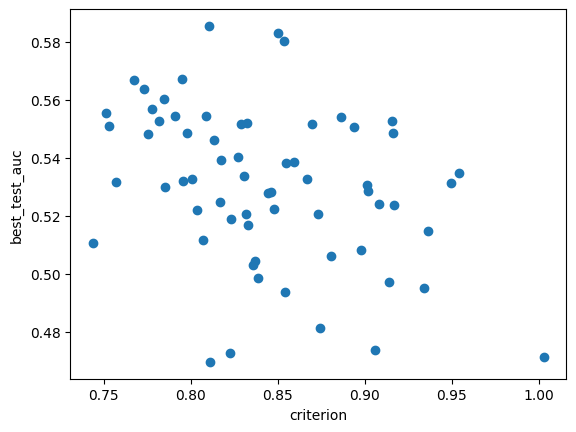

In [40]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

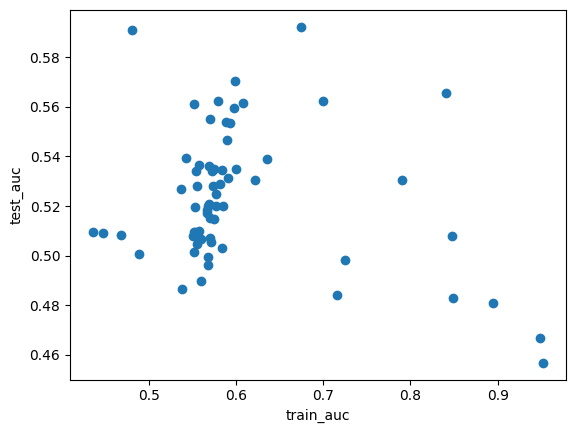

In [41]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

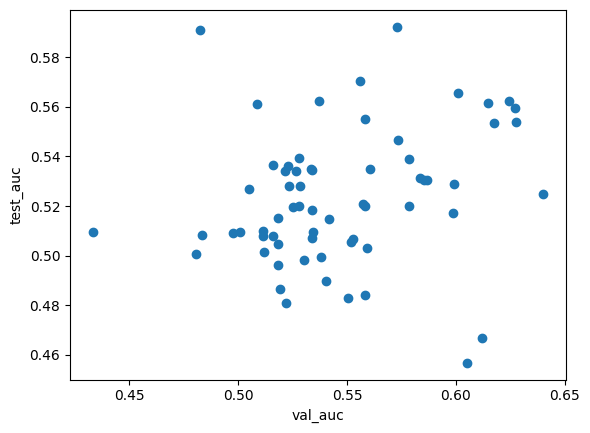

In [42]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

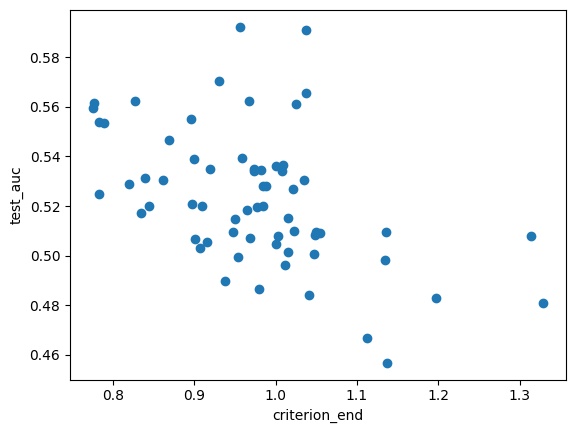

In [43]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

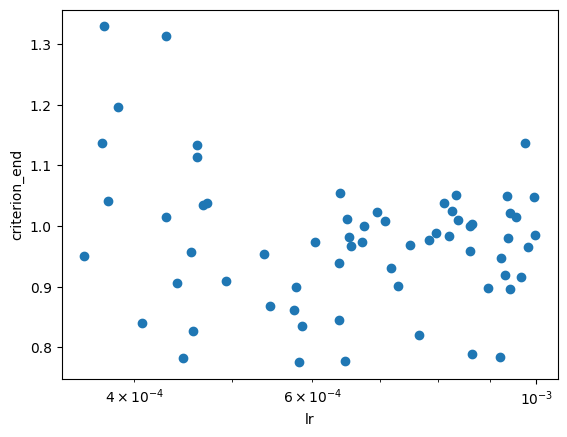

In [44]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

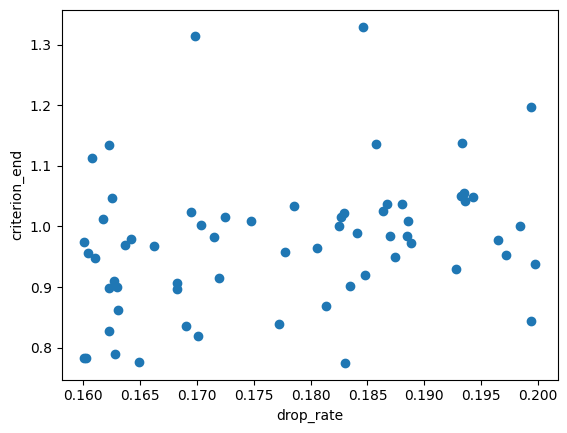

In [45]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_1659473/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


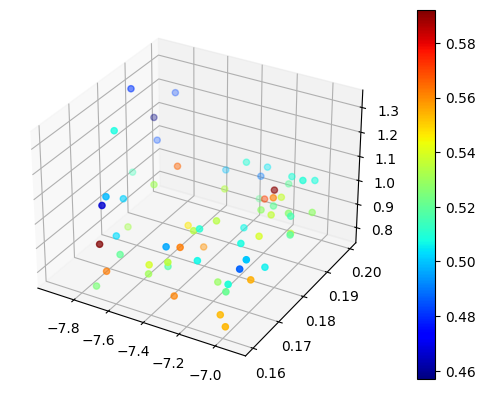

In [46]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1659473/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


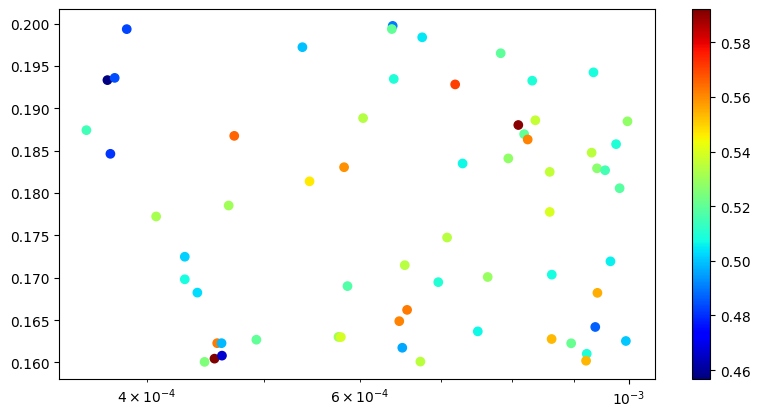

In [47]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1659473/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


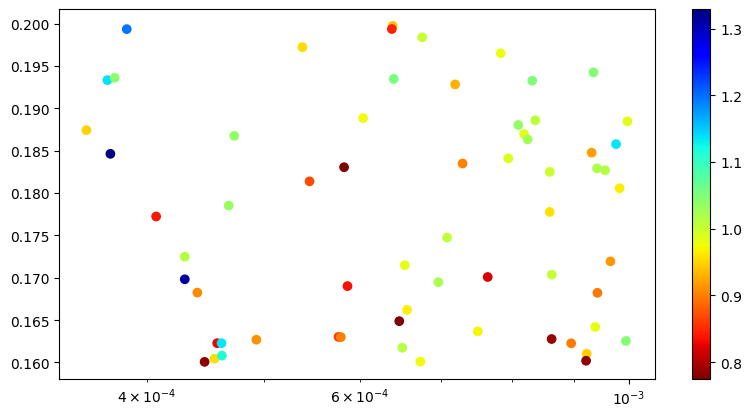

In [48]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

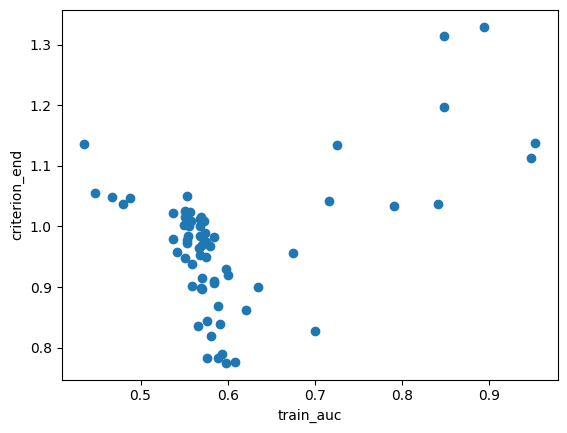

In [49]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

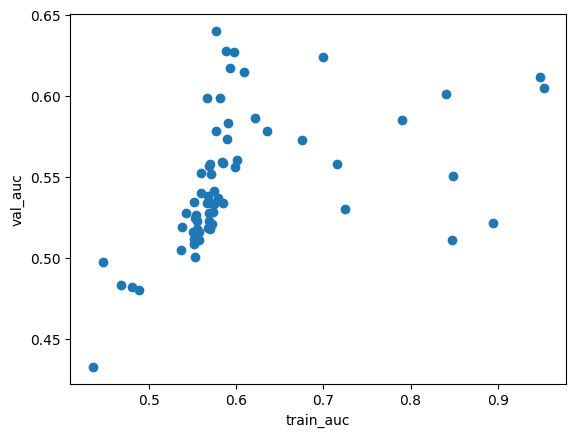

In [50]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

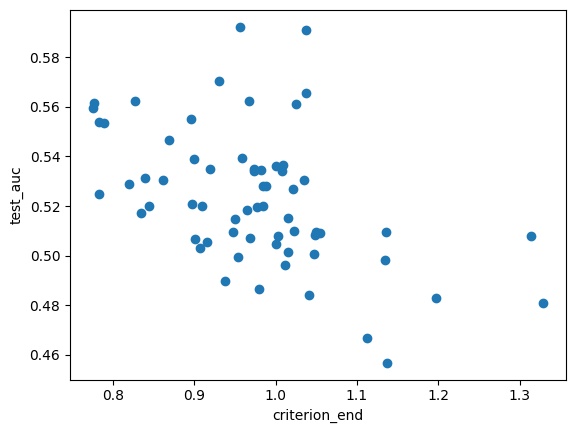

In [51]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

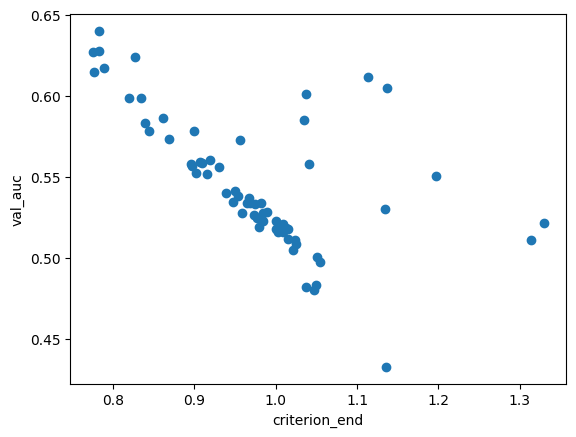

In [52]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

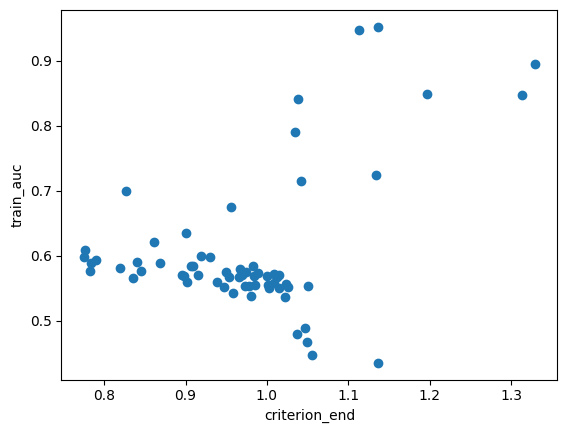

In [53]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [54]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
27,/volatile2/jc225751/Runs/61_classifier_regress...,0.597629,0.627169,0.559307,0.585393,0.633061,0.552670,0.183052,0.914889,0.000582,0.000000,137.929398,0.781547,0.775202,0.006345,-3.043500,-3.230461,-5.747467,-3.341247
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.608416,0.614730,0.561328,0.604998,0.621604,0.563925,0.164873,0.703762,0.000646,0.017198,137.885849,0.773398,0.776854,0.003456,-4.098012,-4.115740,-6.643993,-2.900454
41,/volatile2/jc225751/Runs/61_classifier_regress...,0.576852,0.640262,0.524675,0.577618,0.636989,0.529870,0.160066,0.832383,0.000447,0.000000,138.522766,0.785393,0.782886,0.002507,-2.823960,-2.611697,-5.588399,-3.589280
40,/volatile2/jc225751/Runs/61_classifier_regress...,0.588675,0.627823,0.553824,0.584259,0.640589,0.548341,0.160199,0.857057,0.000922,0.000000,138.310257,0.775152,0.783501,0.008349,-2.876516,-3.012922,-5.699795,-3.373820
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.593137,0.617349,0.553535,0.588856,0.626514,0.560173,0.162766,0.890957,0.000863,0.000000,137.945023,0.784630,0.789514,0.004884,-3.279203,-3.375200,-5.889863,-3.247901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,/volatile2/jc225751/Runs/61_classifier_regress...,0.435272,0.433061,0.509380,0.454675,0.542390,0.471140,0.185775,0.977918,0.000976,0.000000,138.666656,1.002936,1.136090,0.133154,-2.433662,-4.405394,-4.281291,-2.350458
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.952601,0.605237,0.456854,0.670230,0.589525,0.528427,0.193337,0.749294,0.000371,0.000000,124.846741,0.901654,1.136889,0.235236,-2.516963,-1.029000,-4.719932,-2.118351
37,/volatile2/jc225751/Runs/61_classifier_regress...,0.848655,0.550573,0.483117,0.626579,0.590835,0.493795,0.199358,0.787764,0.000385,0.000000,128.927505,0.854075,1.196936,0.342861,-3.331355,-1.177390,-5.546247,-2.569428
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.847843,0.511293,0.507937,0.644848,0.605237,0.551804,0.169817,0.929188,0.000430,0.000000,125.791672,0.829136,1.313965,0.484829,-3.228663,-1.059727,-5.585043,-2.355482


Text(0, 0.5, 'criterion_end')

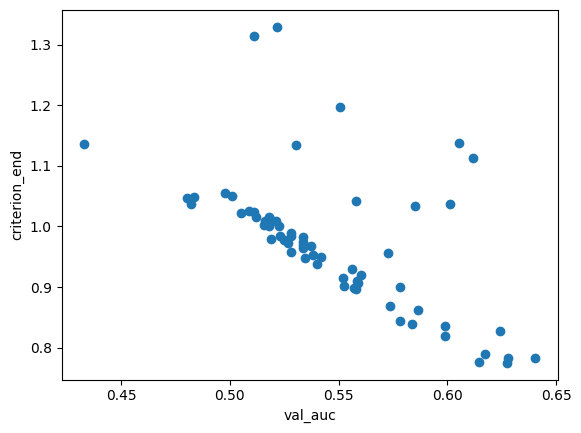

In [55]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

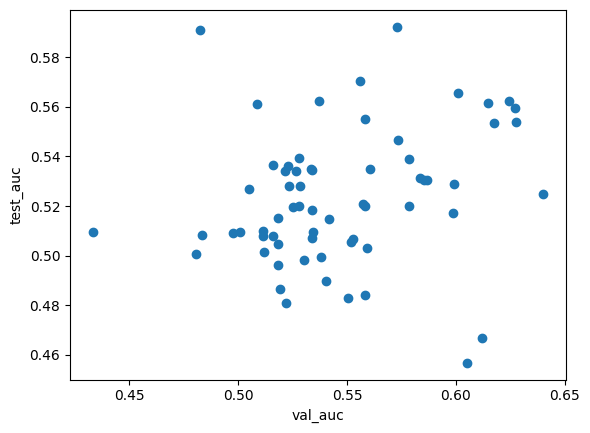

In [56]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")